In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve

# Lab: Decision Trees (adult income dataset)

In [2]:
# Read and visualize dataset
adult_income = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", header = None)
adult_income.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "label"
]

adult_income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
attributes = pd.get_dummies(adult_income.drop("label", axis = 1))
labels = adult_income["label"]

# Split data into train and test sets
attrs_train, attrs_test, lbls_train, lbls_test = train_test_split(attributes, labels, train_size = 0.7, stratify = labels)

decision_tree = DecisionTreeClassifier(criterion = "entropy", max_depth = 4)

In [4]:
# Perform cross validation
cross_val_score(decision_tree, attrs_train, lbls_train, cv = 10)

array([ 0.8495614 ,  0.82807018,  0.83552632,  0.84730145,  0.85081176,
        0.84335235,  0.85037297,  0.83413778,  0.84028082,  0.83625988])

In [5]:
decision_tree.fit(attrs_test, lbls_test)
decision_tree.predict(attrs_test)

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'], dtype=object)

In [6]:
# Export tree
with open("adult.dot", 'w') as f:
    f = export_graphviz(decision_tree, out_file = f)
    
# Convert to PDF
# run dot -Tpdf adult.dot -o adult.pdf in terminal

# Lab: Visualizing Decision Tree Boundaries (iris dataset)

In [7]:
iris = load_iris()

X = iris.data[:, :2] # Sepal length, sepal width
y = iris.target

h = 0.02
color_dict = {0: "blue", 1: "lightgreen", 2: "red"}
colors = [color_dict[i] for i in y]
depth_2 = DecisionTreeClassifier(max_depth = 2).fit(X, y)
depth_4 = DecisionTreeClassifier(max_depth = 4).fit(X, y)
titles = ["Max depth = 2", "Max depth = 4"]

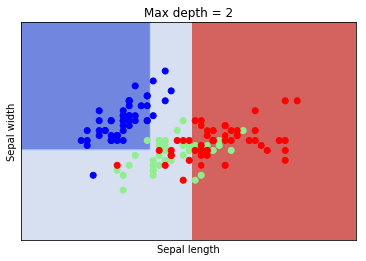

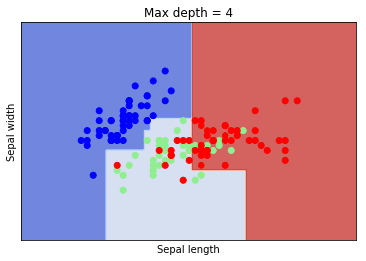

In [8]:
# Create mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

for i, classifier in enumerate((depth_2, depth_4)):
    plt.figure()
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap = plt.cm.coolwarm, alpha = 0.8)
    plt.scatter(X[:, 0], X[:, 1], c = colors, cmap = plt.cm.coolwarm)
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()

# Lab: Random Forests (adult income dataset)

In [9]:
forest_params = {"criterion": ["gini", "entropy"], "n_estimators": [2, 5, 10, 25], "max_depth": [None, 2, 3, 5]}

search = GridSearchCV(RandomForestClassifier(), forest_params)
search.fit(attrs_train, lbls_train)

predicted = search.best_estimator_.predict(attrs_test)

confusion_matrix(lbls_test, predicted)

array([[6863,  554],
       [ 834, 1518]])

# Lab: AdaBoost (adult income dataset)

In [10]:
# Single tree

tree = DecisionTreeClassifier(max_depth = 1)

tree.fit(attrs_train, lbls_train)
train_pred = accuracy_score(lbls_train, tree.predict(attrs_train))
test_pred = accuracy_score(lbls_test, tree.predict(attrs_test))

print("Decision tree train/test accuracies: %.3f/%.3f", train_pred, test_pred)

Decision tree train/test accuracies: %.3f/%.3f 0.75916988417 0.759238407206


In [11]:
# Boosted tree

tree = DecisionTreeClassifier(max_depth = 1)

ada = AdaBoostClassifier(base_estimator = tree, n_estimators = 100, learning_rate = 0.1)
ada.fit(attrs_train, lbls_train)

train_pred = accuracy_score(lbls_train, ada.predict(attrs_train))
test_pred = accuracy_score(lbls_test, ada.predict(attrs_test))

print("AdaBoost tree train/test accuracies: %.3f/%.3f", train_pred, test_pred)

AdaBoost tree train/test accuracies: %.3f/%.3f 0.851614601615 0.860477019142


# Lab: Support Vector Machines (iris dataset)

In [12]:
iris_data_std = iris.data

iris_data_std = (iris_data_std - iris_data_std.mean())
iris_data_std.max() - iris_data_std.min()

attrs_train, attrs_test, lbls_train, lbls_test = train_test_split(iris_data_std, iris.target, train_size = 0.7, stratify = iris.target)

svcParams = {"C": [1, 10, 100, 1000]}
svcGrid = GridSearchCV(SVC(kernel = "linear"), svcParams)
svcGrid.fit(attrs_train, lbls_train)
svm = svcGrid.best_estimator_

print(svm)

svm.fit(attrs_train, lbls_train)
svm.score(attrs_test, lbls_test)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


0.9555555555555556

In [13]:
X = iris_data_std[:, :2] # Sepal length, sepal width
y = iris.target

color_dict = {0: "blue", 1: "lightgreen", 2: "red"}
colors = [color_dict[i] for i in y]
svm.fit(X, y)
titles = ["SVM C = 1, kernel = linear"]

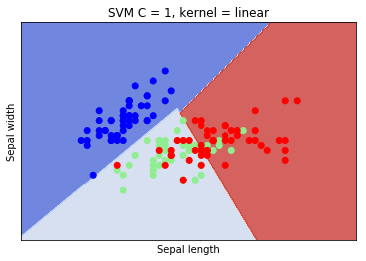

In [14]:
# Create mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

for i, classifier in enumerate((svm, )):
    plt.figure()
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap = plt.cm.coolwarm, alpha = 0.8)
    plt.scatter(X[:, 0], X[:, 1], c = colors, cmap = plt.cm.coolwarm)
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()

# Lab: Kernel SVM on Simulated Data

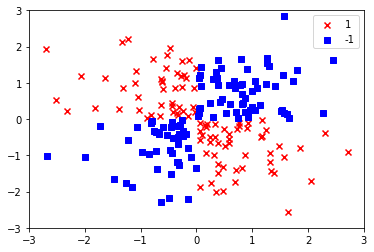

In [15]:
# Create and plot simulated data

X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)

y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1],
c = "r", marker = "x", label = "1")

plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1],
c = "b", marker = "s", label = "-1")

plt.ylim([-3, 3])
plt.legend()
plt.show()

In [16]:
gSVM = SVC(C = 10, kernel = "rbf", gamma = 0.1)

color_dict = {1: "red", -1: "blue"}
colors = [color_dict[i] for i in y_xor]
gSVM.fit(X_xor, y_xor)
titles = ["SVM C = 10, kernel = rbf, gamma = 0.1"]

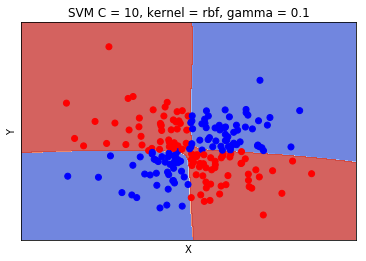

In [17]:
# Plot the decision regions

x_min, x_max = X_xor[:, 0].min() - 1, X_xor[:, 0].max() + 1
y_min, y_max = X_xor[:, 1].min() - 1, X_xor[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

for i, classifier in enumerate((gSVM, )):
    plt.figure()
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap = plt.cm.coolwarm, alpha = 0.8)
    plt.scatter(X_xor[:, 0], X_xor[:, 1], c = colors, cmap = plt.cm.coolwarm)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()

# Lab: Kernel SVM on Real Data (iris dataset)

In [18]:
rbfParams = {"C": [1, 10, 100, 1000, 1000], "gamma": [1e-3, 1e-4]}
rbfGrid = GridSearchCV(SVC(kernel = "rbf", probability = True), rbfParams)
rbfGrid.fit(attrs_train, lbls_train)
rbfSVM = rbfGrid.best_estimator_
print(rbfSVM)
rbfSVM.fit(attrs_train, lbls_train)
print(rbfSVM.score(attrs_test, lbls_test))

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.955555555556


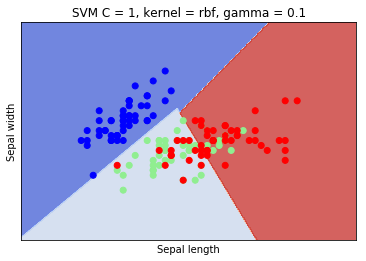

In [19]:
# Plot the decision regions

color_dict = {0: "blue", 1: "lightgreen", 2: "red"}
colors = [color_dict[i] for i in y]
rbfSVM.fit(X, y)
titles = ["SVM C = 1, kernel = rbf, gamma = 0.1"]

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

for i, classifier in enumerate((rbfSVM, )):
    plt.figure()
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap = plt.cm.coolwarm, alpha = 0.8)
    plt.scatter(X[:, 0], X[:, 1], c = colors, cmap = plt.cm.coolwarm)
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()

# Lab: k-Nearest Neighbors (iris dataset)

In [20]:
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(attrs_train, lbls_train)
print(knn.score(attrs_test, lbls_test))

0.955555555556


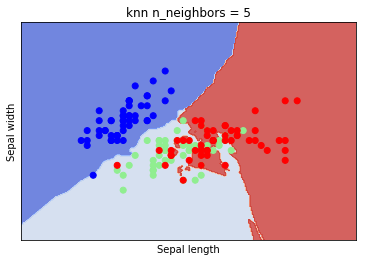

In [21]:
# Plot the decision regions

color_dict = {0: "blue", 1: "lightgreen", 2: "red"}
colors = [color_dict[i] for i in y]
knn.fit(X, y)
titles = ["knn n_neighbors = 5"]

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

for i, classifier in enumerate((knn, )):
    plt.figure()
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap = plt.cm.coolwarm, alpha = 0.8)
    plt.scatter(X[:, 0], X[:, 1], c = colors, cmap = plt.cm.coolwarm)
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()